In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
import access_spectrum as acs
from empca_residuals import *
from scipy.interpolate import interp1d
import os, glob
from apogee.tools import toApStarGrid,pix2wv
from ncells_calculation import *
from comparative_plots import *
%pylab inline

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.


Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  18 # Tune this according to personal preference
}

matplotlib.rc('font',**font)

default_cmap = 'plasma'
datadir = '/geir_data/scr/price-jones/Data/apogee_dim_reduction/'
figdir = '/home/price-jones/Documents/rc_dim_paper'

# Figures

## Figure 1 - Hertzsprung-Russell Diagrams

### Red clump sample

#### To generate data to create this plot, run the next box and fill in the prompts with responses given
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): <press Enter>  
Lower limit (Enter for minimum): <press Enter> 
Found good limits  
And/or? done```
#### Note that this part can take a few minutes

In [13]:
redclump = empca_residuals('apogee','red_clump',maskFilter,ask=True,degree=2,datadir=datadir)

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
And/or? done


/geir_data/scr/price-jones/Data/apogee_dim_reduction//red_clump_12_TEFF_up6268.69189453_lo4130.89257812
NAME  /geir_data/scr/price-jones/Data/apogee_dim_reduction//red_clump_12_TEFF_up6268.69189453_lo4130.89257812
Total 0 of 19935 stars missing


### Red giant sample

#### Now run the box below and fill in the prompts with the responses given
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): <press Enter>  
Lower limit (Enter for minimum): <press Enter>  
Found good limits  
And/or? done```
#### Note that this part can take a few minutes

In [14]:
redgiant = empca_residuals('apogee','red_giant',maskFilter,ask=True,degree=2,datadir=datadir)

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
And/or? done


/geir_data/scr/price-jones/Data/apogee_dim_reduction//red_giant_12_TEFF_up5506.44140625_lo3716.09545898
NAME  /geir_data/scr/price-jones/Data/apogee_dim_reduction//red_giant_12_TEFF_up5506.44140625_lo3716.09545898
Total 0 of 26920 stars missing


In [15]:
def histogram2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    im = ax.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap(default_cmap),
                   vmin=vmin,vmax=vmax)
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=20)
        cbar.ax.tick_params(labelsize=20)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=20)

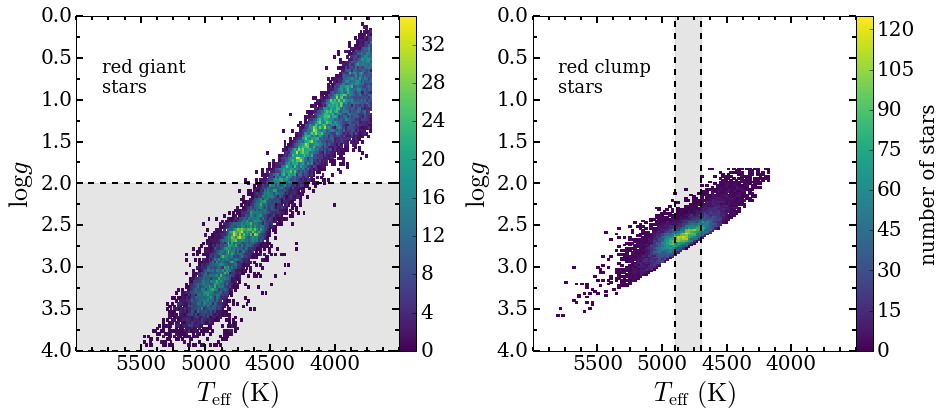

In [18]:
# Choose density colormap
default_cmap = 'viridis'
# Create figure of appropriate size
fig = plt.figure(figsize=(15,6))
# Create red giant subplot
ax = fig.add_subplot(121)
histogram2d(fig,ax,redgiant.teff,redgiant.logg,bins=120,vmax=35)
plt.ylim(4,0)
plt.xlim(6000,3500)
# Don't plot on extremes of axis
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
# Add minor ticks on both axes
xminorlocator = MultipleLocator(250./2)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = MultipleLocator(0.25)
ax.yaxis.set_minor_locator(yminorlocator)
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
plt.yticks(fontsize=20)
# Adjust tick thickness and length
plt.tick_params(which='both', width=2)
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=4)
# Add axis labels
plt.ylabel(r'$\log g$',fontsize=26)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,(\mathrm{K})$',fontsize=26)
# Shade sample area
plt.axhline(2,color='k',ls='--',lw=2)
plt.axhline(4,color='k',ls='--',lw=2)
plt.fill_between(np.arange(3500,6100,100),4,2,alpha=0.1,color='k')
# Add sample description
plt.text(5800,0.5,'red giant\nstars',va='top')

# Create red clump subplot
ax = fig.add_subplot(122)
histogram2d(fig,ax,redclump.teff,redclump.logg,clabel='number of stars',bins=80,vmax=125)
plt.ylim(4,0)
plt.xlim(6000,3500)
# Don't plot on extremes of x axis
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
# Add minor ticks to both axes
xminorlocator = MultipleLocator(250./2)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = MultipleLocator(0.25)
ax.yaxis.set_minor_locator(yminorlocator)
plt.yticks(fontsize=20)
# Adjust tick thickness and length
plt.tick_params(which='both', width=2)
plt.tick_params(which='major',length=7)
plt.tick_params(which='minor',length=4)
# Add axis labels
plt.ylabel(r'$\log g$',fontsize=26)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,(\mathrm{K})$',fontsize=26)
# Shade sample region
plt.axvline(4700,color='k',ls='--',lw=2)
plt.axvline(4900,color='k',ls='--',lw=2)
plt.fill_between(np.arange(4700,5000,100),4,0,alpha=0.1,color='k')
# Label sample
plt.text(5800,0.5,'red clump\nstars',va='top')

# Reduce space between plots and save
plt.subplots_adjust(wspace=0.2)
plt.savefig('{0}/{1}'.format(figdir,'HRdiagram.pdf'))

## Figure 2 - Example polynomial fit for NGC 6819 in Teff

#### Run the box below using the bolded responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819  
And/or? done```

In [19]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir=datadir)
oc.findResiduals(minStarNum=5,gen=True)
correction = oc.findCorrection(median=True,numpix=30.,savename='n6819_dr12_30px.pkl')

Which data release? (Enter for 12): 
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? match
Match value: N6819
And/or? done


/geir_data/scr/price-jones/Data/apogee_dim_reduction//clusters_12_CLUSTER_matchN6819
NAME  /geir_data/scr/price-jones/Data/apogee_dim_reduction//clusters_12_CLUSTER_matchN6819


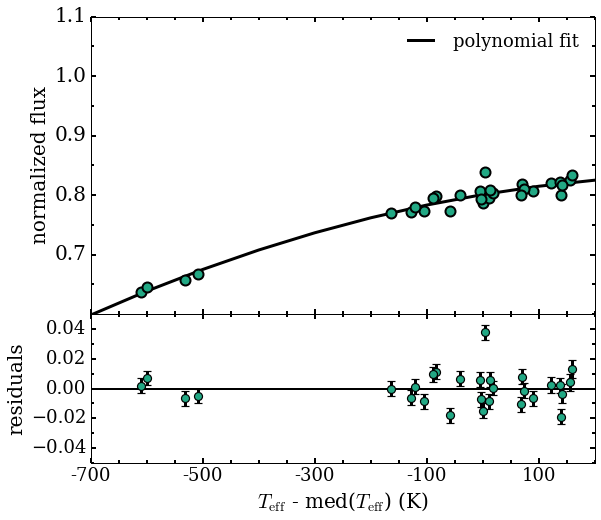

In [20]:
oc.plot_example_fit(indep=1,pixel=4313,xlabel='$T_{\mathrm{eff}}$ - med($T_{\mathrm{eff}}$) (K)',figsize=(10,8))
plt.subplots_adjust(left=0.2)
plt.savefig('{0}/example_fit.pdf'.format(figdir))

## Figure 3 - Comparing EMPCA model with data

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

In [3]:
subrc = empca_residuals('apogee','red_clump',maskFilter,ask=True,degree=2,badcombpixmask=7935,datadir = datadir)
subrc.findResiduals(gen=False)

Which data release? (Enter for 12): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 4900
Lower limit (Enter for minimum): 4700
Found good limits
And/or? and
Data key: MEANFIB
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 300
Lower limit (Enter for minimum): 100
Found good limits
And/or? done


#### This box will take a few hours to run

In [6]:
subrc.pixelEMPCA(nvecs=20,varfunc=meanMed,savename='eig20_minSNR50_corrNone_meanMed2.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.01944634      2.22647129
EMPCA  2/25       0.12586238      1.84370218
EMPCA  3/25       0.23497501      1.59595446
EMPCA  4/25       0.25197757      1.56271999
EMPCA  5/25       0.25731060      1.55335551
EMPCA  6/25       0.25893361      1.55134022
EMPCA  7/25       0.26264654      1.54645836
EMPCA  8/25       0.26340008      1.54380004
EMPCA  9/25       0.26366156      1.54242223
EMPCA 10/25       0.26449272      1.54160920
EMPCA 11/25       0.26488569      1.54090991
EMPCA 12/25       0.26711279      1.53607408
EMPCA 13/25       0.26704708      1.53567037
EMPCA 14/25       0.26554133      1.53879393
EMPCA 15/25       0.26445248      1.54144083
EMPCA 16/25       0.26568749      1.53962401
EMPCA 17/25       0.26733323      1.53545189
EMPCA 18/25       0.26905629      1.53157522
EMPCA 19/25       0.27153474      1.52763963
EMPCA 20/25       0.27087505      1.52840203
EMPCA 21/25       0.26669485      1.53749687
EMPCA 22/25    

In [7]:
subrcmodel = acs.pklread('{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/eig20_minSNR50_corrNone_meanMed.pkl'.format(datadir))
# Retrieve data
subrcmodel=getarrays(subrcmodel)
# Reconstruct unsaved data from model
subrcmodel=reconstruct_EMPCA_data('{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),subrcmodel,minStarNum=5)
# Start with baseline as 
totalapprox = np.tile(np.ma.mean(subrcmodel.residuals,axis=0),(subrcmodel.residuals.shape[0],1))
nvec = 8
for i in range(nvec):
    totalapprox += np.outer(subrcmodel.coeff[:, i], subrcmodel.eigvec[i])

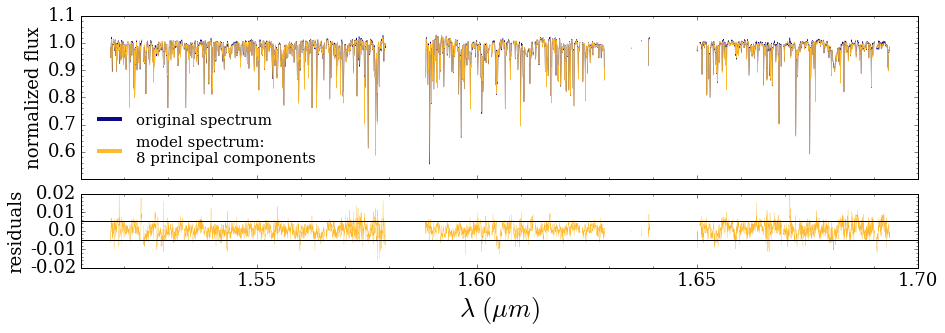

In [8]:
# Choose star
indx=312
# Retrieve plot colours
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,2))
# Set bounds on the apStarGrid
pixup = 8575
pixdown = 0

# Convert spectra to apStarGrid and reapply mask
fitspec = toApStarGrid(subrcmodel.fitspec[indx])
fitspec = np.ma.masked_array(fitspec,mask=fitspec==0)
modelspec = toApStarGrid(totalapprox[indx])
modelspec = np.ma.masked_array(modelspec,mask=modelspec==0)
compspec = toApStarGrid(subrcmodel.spectra[indx])
compspec = np.ma.masked_array(compspec,mask=(modelspec.mask|fitspec.mask))
resspec = toApStarGrid(subrcmodel.residuals[indx])
resspec = np.ma.masked_array(resspec,mask=compspec.mask)
errspec = toApStarGrid(subrcmodel.spectra_errs[indx])
errspec = np.ma.masked_array(errspec,mask=compspec.mask)
# Create array of wavelength values
wvs = pix2wv(np.arange(pixdown,pixup),apStarWavegrid = True)/1e4
# Specify xtick location
stepsize = 0.05
xticks = np.linspace(wvs[0],wvs[-1]+stepsize,stepsize)

# Initialize figure
plt.figure(figsize=(15,5))

# Begin model subplot
fit = plt.subplot2grid((3,1), (0, 0), rowspan=2)
# Plot spectrum and model
fit.plot(wvs,compspec[pixdown:pixup],lw=0.5,color=colors[0],label='original spectrum')
fit.plot(wvs,(modelspec[pixdown:pixup]+fitspec[pixdown:pixup]),lw=0.5,color=colors[-1],label='model spectrum:\n{0} principal components'.format(nvec))
fit.set_xlim(wvs[0],wvs[-1])
# Add minor ticks and labels
xminorlocator = AutoMinorLocator()
fit.xaxis.set_minor_locator(xminorlocator)
yminorlocator = AutoMinorLocator()
fit.yaxis.set_minor_locator(yminorlocator)
fit.set_xticklabels(['']*len(xticks))
fit.set_ylabel('normalized flux')
ymax=1.1
ymin=0.6
yticks = np.linspace(ymin,ymax,6)
fit.set_yticks(yticks)
fit.set_yticklabels(yticks)
# Create legend
legend = fit.legend(loc='best',fontsize=15)
legend.get_frame().set_linewidth(0.0)
for legobj in legend.legendHandles:
    legobj.set_linewidth(4.0)
    
# Begin residual subplot
res = plt.subplot2grid((3,1), (2, 0))
# Plot model residuals
res.plot(wvs,(compspec[pixdown:pixup] - (modelspec[pixdown:pixup]+fitspec[pixdown:pixup])),lw=0.3,color=colors[-1])
# Mark median measurement uncertainty
res.axhline(-np.ma.median(errspec[pixdown:pixup]),color='k')
res.axhline(np.ma.median(errspec[pixdown:pixup]),color='k')
res.set_xlim(wvs[0],wvs[-1])
# Add minor ticks and labels
ymax=0.02
ymin=-0.02
yticks = np.linspace(ymin,ymax,5)
res.set_ylim(ymin,ymax)
res.set_yticks(yticks)
res.set_yticklabels(yticks)
xminorlocator = AutoMinorLocator()
res.xaxis.set_minor_locator(xminorlocator)
yminorlocator = AutoMinorLocator()
res.yaxis.set_minor_locator(yminorlocator)
res.set_ylabel('residuals')
res.set_xlabel('$\lambda\,\,(\mu m)$',fontsize=26)

# Adjust subplot positions and save figure
plt.subplots_adjust(bottom=0.2)
plt.savefig('{0}/model_comp_star{1}.pdf'.format(figdir,indx))

## Figure 4 - Open cluster R2 values

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? done  ```

In [ ]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir = datadir)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

#### Run the box below using the given responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? and  
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

In [ ]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,datadir = datadir)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

#### Run the box below using the bolded responses to the prompts

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished   
Data key: CLUSTER  
Default is full range. Match or slice? match  
Match value: N6819   
And/or? and  
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

In [ ]:
oc = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,badcombpixmask=7935,datadir = datadir)
oc.pixelEMPCA(nvecs=5,varfunc=np.ma.var,savename='eig5_minSNR50_corrNone_var.pkl')
oc.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

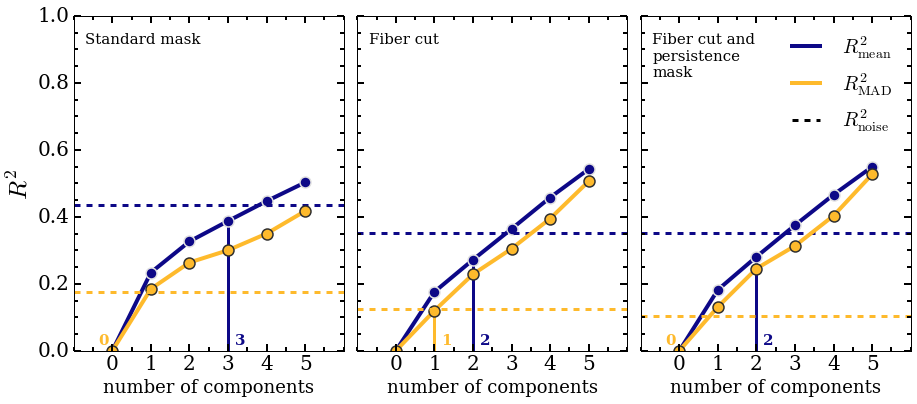

In [16]:
direcs = ['{0}/clusters_12_CLUSTER_matchN6819/bm4351'.format(datadir),
          '{0}/clusters_12_CLUSTER_matchN6819_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/clusters_12_CLUSTER_matchN6819_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard mask',
          'Fiber cut',
          'Fiber cut and \npersistence\nmask']
models = ['eig5_minSNR50_corrNone_var.pkl',
          'eig5_minSNR50_corrNone_meanMed.pkl']
labels = [r'$R^2_{\mathrm{mean}}$',r'$R^2_{\mathrm{MAD}}$']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6))


## Figure 5 - R2 for red clump 200K slice subsample comparison

### To create the data for this figure, an external script is needed
Run **rc_example_method_comp.py** 3 times after modifying the `datadir` variable to match the one defined at the top of this notebook (local directory by default).

The script will prompt for responses for each of the three runs, which can be run in parallel. Each will create subsamples of the full sample to use in jackknifing - the number run in parallel at a given time is controlled by the `maxsamp` parameter at the top of the file. Fill out the prompts for each run with the responses given below.

#### First run

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? done```

#### Second run

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Third run - prior to beginning this, change the `bmask` variable to 7935

```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

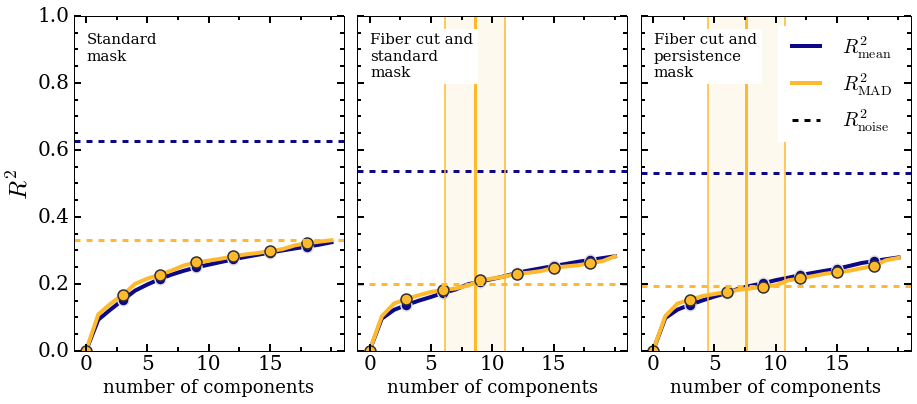

In [18]:
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard\nmask',
          'Fiber cut and\nstandard\nmask',
          'Fiber cut and\npersistence\nmask']
models = ['eig20_minSNR50_corrNone_var.pkl',
          'eig20_minSNR50_corrNone_meanMed.pkl']
labels = [r'$R^2_{\mathrm{mean}}$',r'$R^2_{\mathrm{MAD}}$']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))        

contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6),subsamples=25)

## Figure 6 - Ncells for red clump 200K slice subsample comparison

### This figure uses the same data as used in Figure 5 above

array([[ 9.,  7.],
       [ 9.,  7.],
       [ 9.,  7.]])

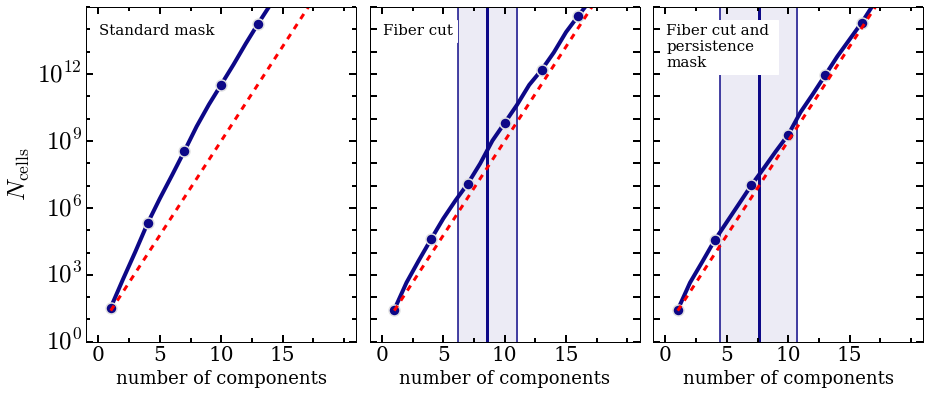

In [27]:
direcs = ['{0}/red_clump_12_TEFF_up4900.0_lo4700.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm4351'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
titles = ['Standard mask',
          'Fiber cut',
          'Fiber cut and \npersistence\nmask']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))

contrast_Ncells(direcs,models,labels,colors,titles=titles,figsize=(15,6),generate = True,subsamples=25,makemodel=False)

## Figure 7 - R2-R2noise intersection for various samples

### This plot also requires an external script to generate data

Run **sample_jackknife.py** 3 times after modifying the `datadir` variable to match the one defined at the top of this notebook (local directory by default).

The script will prompt for responses for each of the three runs, which can be run in parallel. Each will create subsamples of the full sample to use in jackknifing - the number run in parallel at a given time is controlled by the `maxsamp` parameter at the top of the file. Fill out the prompts for each run with the responses given below.

#### First run
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4800   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Second run
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4700  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Third run
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: TEFF  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4900   
Lower limit (Enter for minimum): 4800  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

Change the `sample_type` variable from `'red_clump'` to `'red_giant'` for subsequent runs.

#### Fourth run
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: LOGG  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 4   
Lower limit (Enter for minimum): 3  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

#### Fifth run
```Which data release? (Enter for 12): <press Enter>  
Type done at any prompt when finished  
Data key: LOGG  
Default is full range. Match or slice? slice    
Upper limit (Enter for maximum): 3   
Lower limit (Enter for minimum): 2  
Found good limits  
And/or? and 
Data key: MEANFIB  
Default is full range. Match or slice? slice  
Upper limit (Enter for maximum): 300  
Lower limit (Enter for minimum): 100  
Found good limits  
And/or? done```

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


array([  5.95173614,   7.72443255,   9.7360138 ,  14.13461626,  11.59370024])

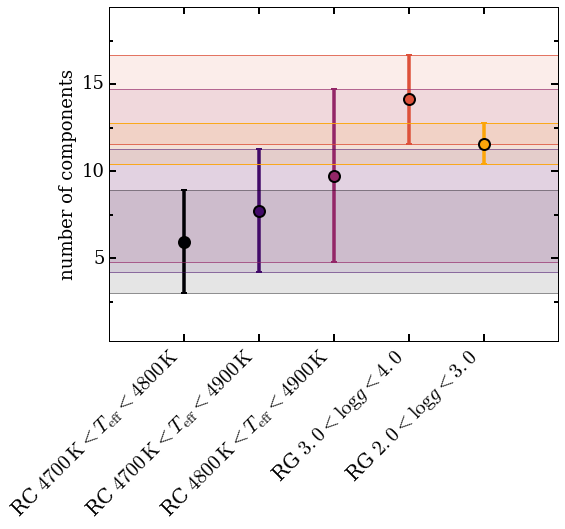

In [479]:
direcs = ['{0}/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir),
          '{0}/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935'.format(datadir)]
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('inferno')(np.linspace(0,0.8,len(models)*len(direcs)))
sample_compare_nvec(direcs,models,labels,subsamples=25,figsize=(8,8),seeds=seeds,colour=colours,savename='nvec_comp.pdf',rotation=45,ha='right',bottom_margin=0.35)

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


array([  1.46944371e+05,   4.53409254e+07,   3.69592705e+07,
         2.71403656e+11,   1.31407433e+12])

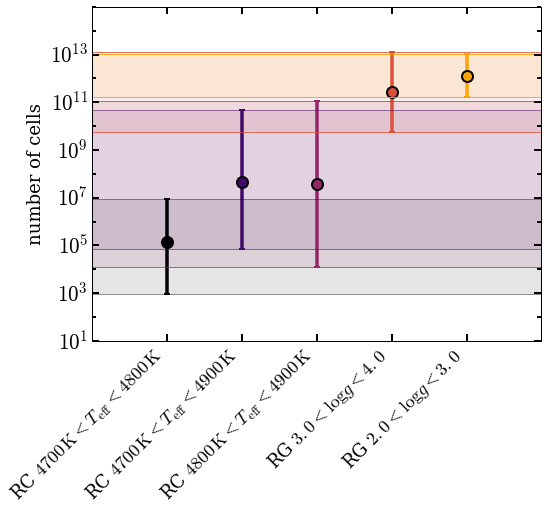

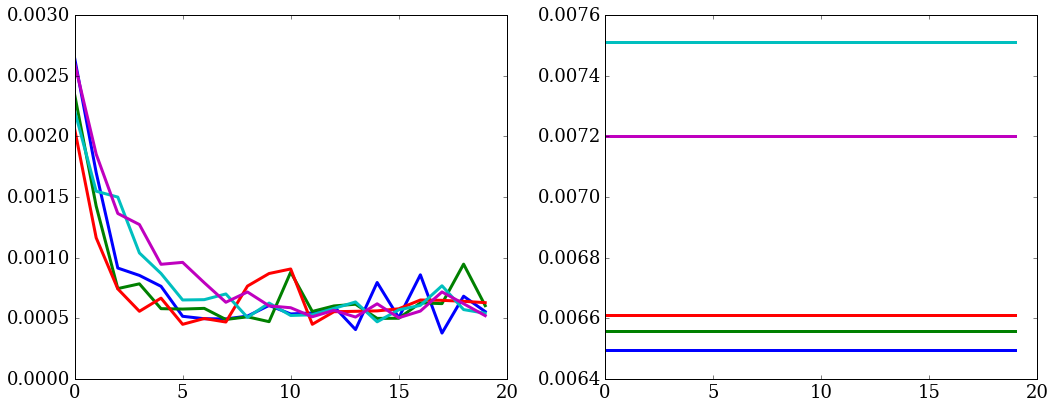

In [503]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('inferno')(np.linspace(0,0.8,len(models)*len(direcs)))
sample_compare_ncells(direcs,models,labels,subsamples=25,generate=True,seeds=seeds,figsize=(8,8),colour=colours,savename='ncells_comp.pdf',rotation=45,ha='right',bottom_margin=0.35)

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


array([  7.38202894,   9.79950753,   5.98813757,   6.4403403 ,  11.09880666])

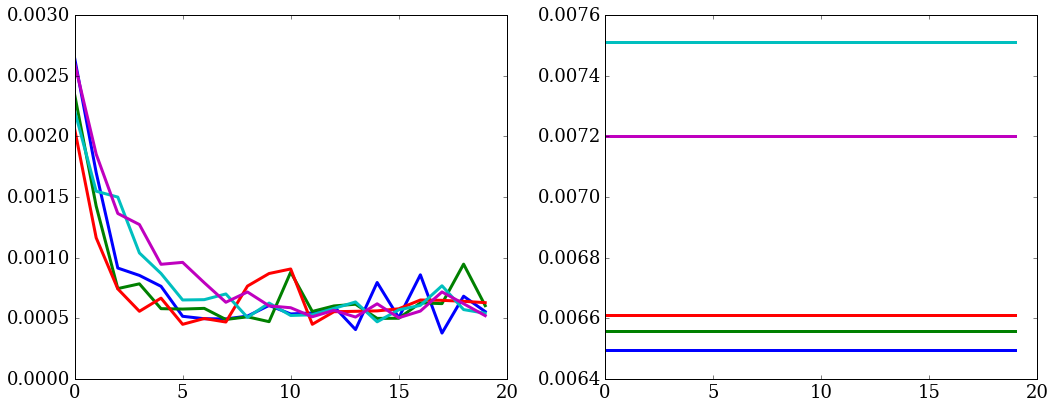

In [290]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('viridis')(np.linspace(0,0.9,len(models)*len(direcs)))
sample_compare_ncells_axis(direcs,models,labels,subsamples=25,generate=True,seeds=seeds,figsize=(8,8),colour=colours,savename='ncells_axis_comp.pdf',rotation=45,ha='right',bottom_margin=0.35)

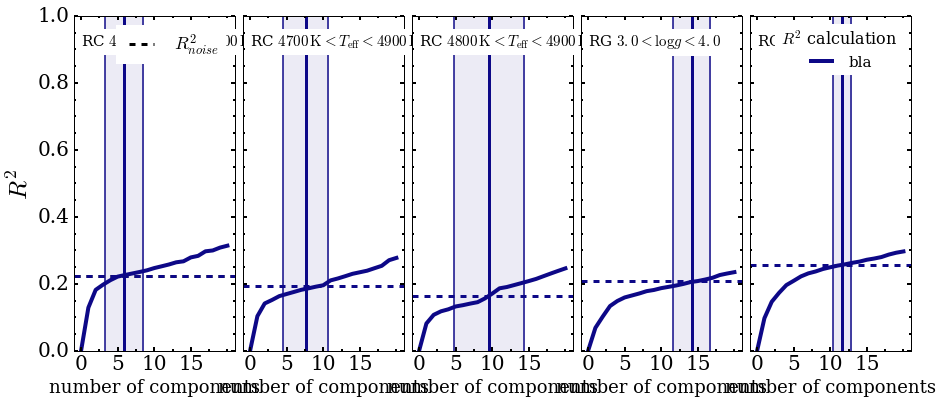

In [186]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['bla']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6),subsamples=25,tingpredict=False)

[ 0.01788536  0.00737762  0.00212848  0.00185474  0.00148456  0.00067784
  0.00062645  0.00062208  0.00068211  0.00093478  0.00072956  0.00075161
  0.00090771  0.00042019  0.00160933  0.00064812  0.00187725  0.00036262
  0.00118396  0.00078417] [ 0.00649516  0.00649516  0.00649516  0.00649516  0.00649516  0.00649516
  0.00649516  0.00649516  0.00649516  0.00649516  0.00649516  0.00649516
  0.00649516  0.00649516  0.00649516  0.00649516  0.00649516  0.00649516
  0.00649516  0.00649516]
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935, (array([ 7.96351545,  4.37721365]), 1)
[ 0.03165102  0.01165302  0.00318136  0.00352583  0.0019228   0.00190126
  0.00193899  0.00137592  0.00150192  0.00127562  0.00444495  0.00177279
  0.00207566  0.00217397  0.00142615  0.00143218  0.00225383  0.00220885
  0.00513914  0.00209042] [ 0.006559  0.006559  0.006559  0.006559  0.006559  0.006559  0.006559
  0.006559  0.006559  0.006559  0.

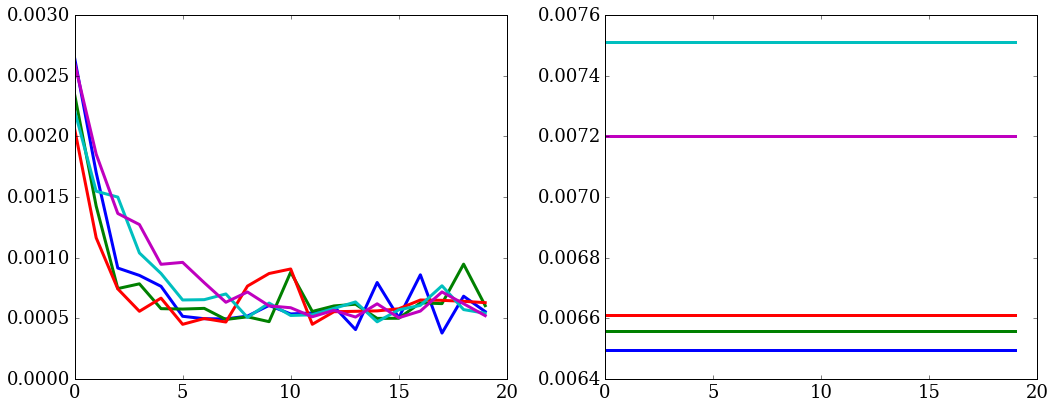

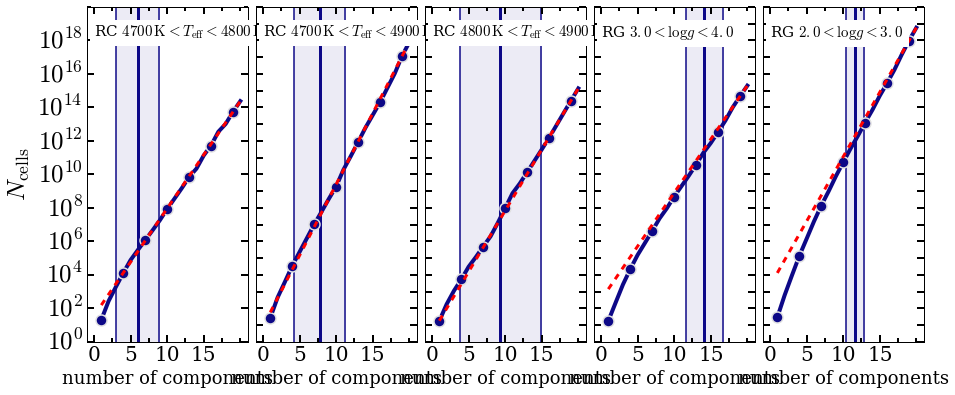

In [42]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),ybounds=(1,1e20),tingpredict=False,generate=True,subsamples=25,denom=consth)

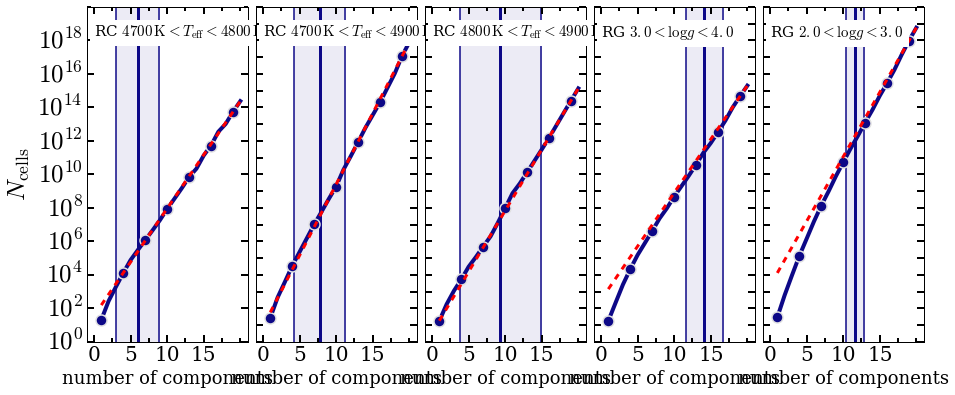

In [41]:
import ncells_calculation
reload(ncells_calculation)
import comparative_plots
reload(comparative_plots)
from comparative_plots import *
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),ybounds=(1,1e20),generate=True,subsamples=25,denom=consth,ncent=10)

In [42]:
p

array([[  7.96351545,   4.37721365],
       [  9.40744978,   7.07068804],
       [  7.83215756,   5.37697761],
       [  8.90481109,   4.36241753],
       [ 11.05294086,   5.9015516 ]])

In [44]:
numberstars = np.array([3191.,5738.,2547.,6532.,3618.])
maxstars = 5738.+6532.+3618.
weights = (numberstars/maxstars)/np.sum((numberstars/maxstars))
Ncells_expo = np.median(p[:,0])#*(weights))
delta_Ncells_expo = np.sqrt(meanMed(p[:,0]))#*(weights))
Ncells_fact = np.median(p[:,1])#*(weights))
delta_Ncells_fact = np.sqrt(meanMed(p[:,1]))#*(weights))
print Ncells_expo, delta_Ncells_expo, Ncells_fact, delta_Ncells_fact

8.90481109177 1.74213136512 5.37697761068 1.507986129


2.81420614987e-07
[ 0.01788536  0.00737762  0.00212848  0.00185474  0.00148456  0.00067784
  0.00062645  0.00062208  0.00068211  0.00093478  0.00072956  0.00075161
  0.00090771  0.00042019  0.00160933  0.00064812  0.00187725  0.00036262
  0.00118396  0.00078417] [ 0.01590588  0.01590588  0.01590588  0.01590588  0.01590588  0.01590588
  0.01590588  0.01590588  0.01590588  0.01590588  0.01590588  0.01590588
  0.01590588  0.01590588  0.01590588  0.01590588  0.01590588  0.01590588
  0.01590588  0.01590588]
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935, (array([ 4.0222094 ,  1.80902699]), 1)
2.66832798757e-07
[ 0.03165102  0.01165302  0.00318136  0.00352583  0.0019228   0.00190126
  0.00193899  0.00137592  0.00150192  0.00127562  0.00444495  0.00177279
  0.00207566  0.00217397  0.00142615  0.00143218  0.00225383  0.00220885
  0.00513914  0.00209042] [ 0.03489352  0.03489352  0.03489352  0.03489352  0.03489352  0.03489

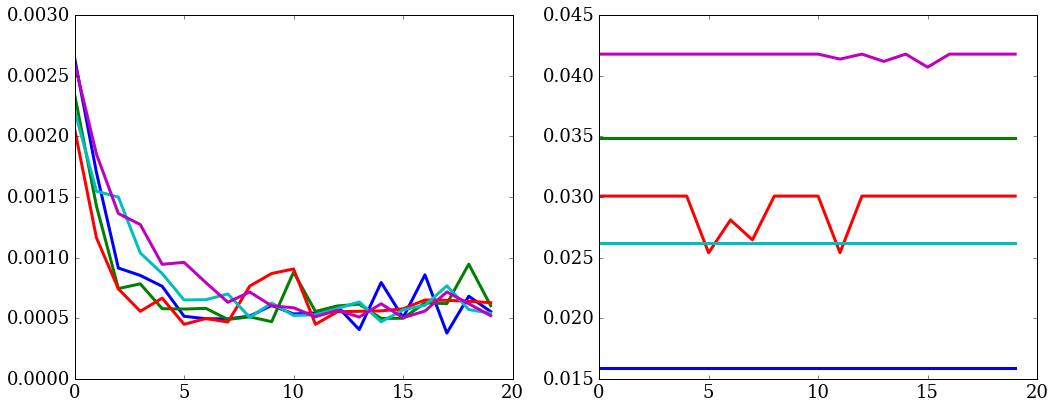

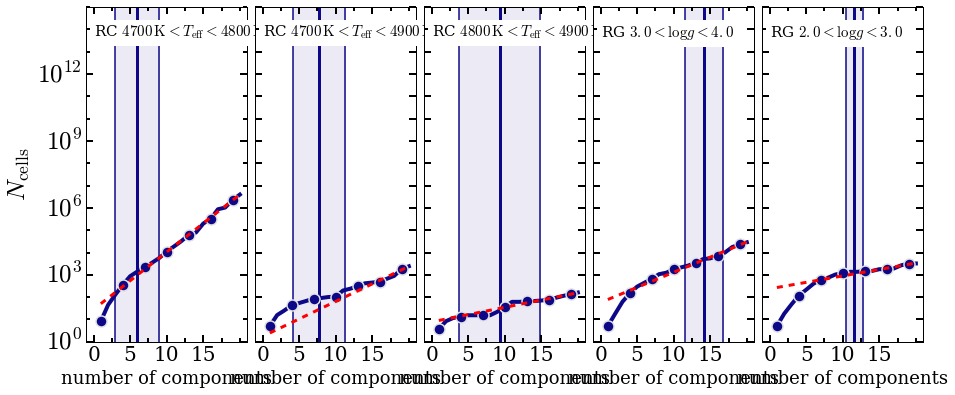

In [126]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),tingpredict=False,generate=True,subsamples=25,denom=pessimh,givecvc='mid')

In [127]:
numberstars = np.array([3191.,5738.,2547.,6532.,3618.])
maxstars = 5738.+6532.+3618.
weights = (numberstars/maxstars)/np.sum((numberstars/maxstars))
Ncells_expo = np.median(p[:,0])#*(weights))
delta_Ncells_expo = np.sqrt(meanMed(p[:,0]))#*(weights))
Ncells_fact = np.median(p[:,1])#*(weights))
delta_Ncells_fact = np.sqrt(meanMed(p[:,1]))#*(weights))
print Ncells_expo, delta_Ncells_expo, Ncells_fact, delta_Ncells_fact

2.95206646454 1.4001369604 1.36643009666 0.35863250809


[ 0.01788536  0.00737762  0.00212848  0.00185474  0.00148456  0.00067784
  0.00062645  0.00062208  0.00068211  0.00093478  0.00072956  0.00075161
  0.00090771  0.00042019  0.00160933  0.00064812  0.00187725  0.00036262
  0.00118396  0.00078417] [ 0.03247582  0.03247582  0.03247582  0.03247582  0.03247582  0.02603542
  0.02502908  0.02494148  0.02611728  0.03057422  0.02701045  0.0274155
  0.03012826  0.02049856  0.03247582  0.02545819  0.03247582  0.01904261
  0.03247582  0.02800299]
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935, (array([ 1.37802055,  1.06015974]), 1)
[ 0.03165102  0.01165302  0.00318136  0.00352583  0.0019228   0.00190126
  0.00193899  0.00137592  0.00150192  0.00127562  0.00444495  0.00177279
  0.00207566  0.00217397  0.00142615  0.00143218  0.00225383  0.00220885
  0.00513914  0.00209042] [ 0.03279501  0.03279501  0.03279501  0.03279501  0.03279501  0.03279501
  0.03279501  0.03279501  0.03279

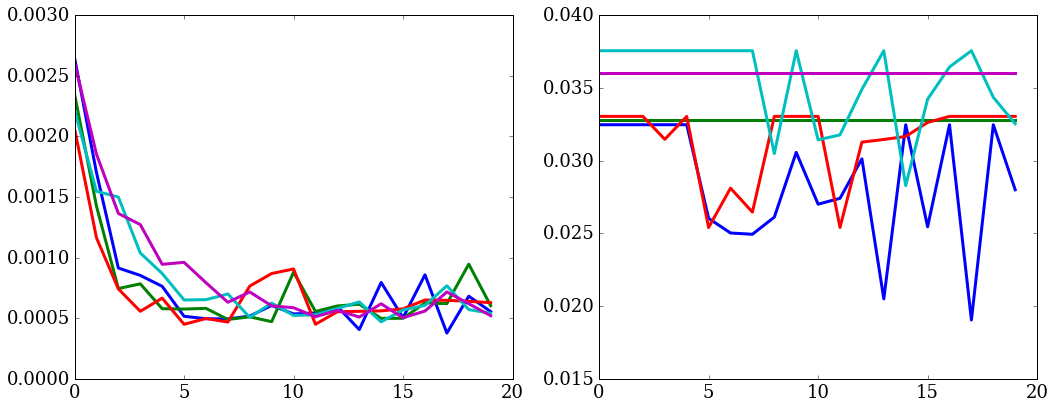

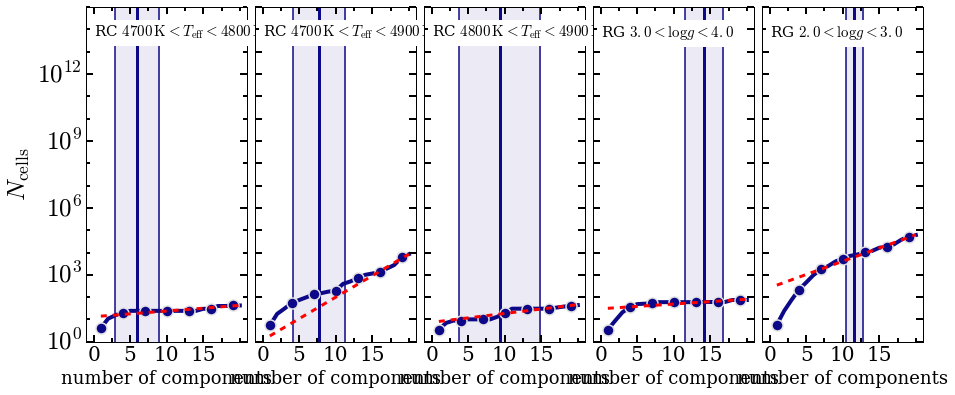

In [128]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),tingpredict=False,generate=True,subsamples=25,denom=consth,scale=5)

In [129]:
numberstars = np.array([3191.,5738.,2547.,6532.,3618.])
maxstars = 5738.+6532.+3618.
weights = (numberstars/maxstars)/np.sum((numberstars/maxstars))
Ncells_expo = np.median(p[:,0])#*(weights))
delta_Ncells_expo = np.sqrt(meanMed(p[:,0]))#*(weights))
Ncells_fact = np.median(p[:,1])#*(weights))
delta_Ncells_fact = np.sqrt(meanMed(p[:,1]))#*(weights))
print Ncells_expo, delta_Ncells_expo, Ncells_fact, delta_Ncells_fact

1.6930554647 1.33226043596 1.09603949963 0.34156903639


[ 0.01788536  0.00737762  0.00212848  0.00185474  0.00148456  0.00067784
  0.00062645  0.00062208  0.00068211  0.00093478  0.00072956  0.00075161
  0.00090771  0.00042019  0.00160933  0.00064812  0.00187725  0.00036262
  0.00118396  0.00078417] [ 0.06495163  0.06495163  0.04613545  0.04306672  0.03852999  0.02603542
  0.02502908  0.02494148  0.02611728  0.03057422  0.02701045  0.0274155
  0.03012826  0.02049856  0.04011644  0.02545819  0.04332721  0.01904261
  0.0344087   0.02800299]
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935, (array([ 0.42886594,  1.00345923]), 1)
[ 0.03165102  0.01165302  0.00318136  0.00352583  0.0019228   0.00190126
  0.00193899  0.00137592  0.00150192  0.00127562  0.00444495  0.00177279
  0.00207566  0.00217397  0.00142615  0.00143218  0.00225383  0.00220885
  0.00513914  0.00209042] [ 0.06559003  0.06559003  0.05640358  0.05937866  0.04384979  0.04360349
  0.04403398  0.03709344  0.03875

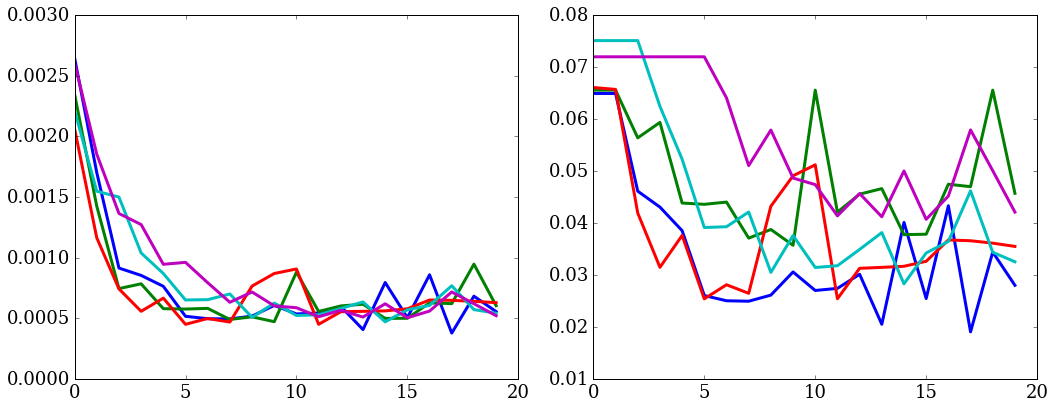

In [130]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),tingpredict=False,generate=True,subsamples=25,denom=consth,scale=10)

In [33]:
numberstars = np.array([3191.,5738.,2547.,6532.,3618.])
maxstars = 5738.+6532.+3618.
weights = (numberstars/maxstars)/np.sum((numberstars/maxstars))
Ncells_expo = np.median(p[:,0])#*(weights))
delta_Ncells_expo = np.sqrt(meanMed(p[:,0]))#*(weights))
Ncells_fact = np.median(p[:,1])#*(weights))
delta_Ncells_fact = np.sqrt(meanMed(p[:,1]))#*(weights))
print Ncells_expo, delta_Ncells_expo, Ncells_fact, delta_Ncells_fact

1.84547286944 0.38730486625 1.25462796114 0.197632467491


In [34]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))
seeds = [44,26,25,95,62]
p = contrast_Ncells(direcs,models,labels,colors,titles=titles,seeds=seeds,figsize=(15,6),tingpredict=False,generate=True,subsamples=25,denom=consth,scale=15)

[ 0.12893026  0.0531831   0.01534358  0.01337029  0.01070175  0.00488637
  0.00451593  0.00448437  0.00491714  0.00673857  0.00525922  0.00541813
  0.00654343  0.00302903  0.01160118  0.0046721   0.01353252  0.00261403
  0.00853481  0.00565283] [ 0.09742745  0.09742745  0.09742745  0.09742745  0.09742745  0.06990258
  0.06720064  0.06696547  0.07012236  0.08208881  0.07252045  0.07360797
  0.08089146  0.05503665  0.09742745  0.06835278  0.09742745  0.05112756
  0.09238404  0.07518532]
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935, (array([ 1.13264647,  1.03439981]), 1)
[ 0.10338013  0.03806166  0.01039113  0.01151623  0.00628036  0.00621
  0.00633323  0.00449411  0.00490564  0.0041665   0.0145183   0.00579037
  0.00677963  0.00710074  0.00465815  0.00467785  0.00736156  0.00721465
  0.0167857   0.00682784] [ 0.09838504  0.09838504  0.09838504  0.09838504  0.07924871  0.07880357
  0.07958159  0.06703812  0.0700402

In [116]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('viridis')(np.linspace(0,0.9,len(models)*len(direcs)))
sample_compare_ncells(direcs,models,labels,subsamples=25,seeds=seeds,figsize=(8,8),colour=colours,savename='ncells_lamnoise_comp.pdf',rotation=45,ha='right',bottom_margin=0.35,denom=pessimh)

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


array([ 3.0016691 ,  1.79035361,  1.28272232,  1.82995342,  1.86303175])

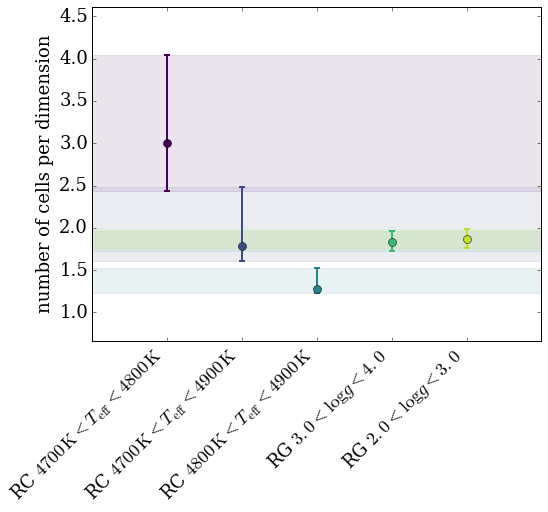

In [292]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('viridis')(np.linspace(0,0.9,len(models)*len(direcs)))
sample_compare_ncells_axis(direcs,models,labels,subsamples=25,seeds=seeds,figsize=(8,8),colour=colours,savename='ncells_lamnoise_comp.pdf',rotation=45,ha='right',bottom_margin=0.35,denom=pessimh)

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


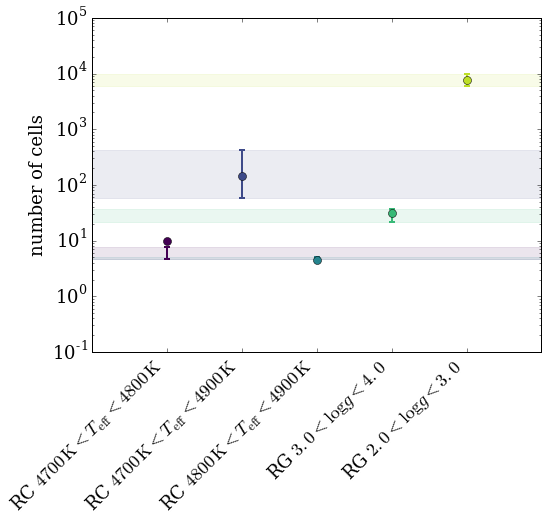

In [187]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('viridis')(np.linspace(0,0.9,len(models)*len(direcs)))
sample_compare_ncells(direcs,models,labels,subsamples=25,scale=5,seeds=seeds,figsize=(8,8),generate=True,colour=colours,savename='ncells_lamnoise_comp.pdf',rotation=45,ha='right',bottom_margin=0.35,denom=consth)

/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed44*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed26*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed36*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed95*numeigvec.npy
/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935/subsamples25*meanMed*seed62*numeigvec.npy


array([ 1.46925076,  1.90519126,  1.16657846,  1.27595278,  2.16318974])

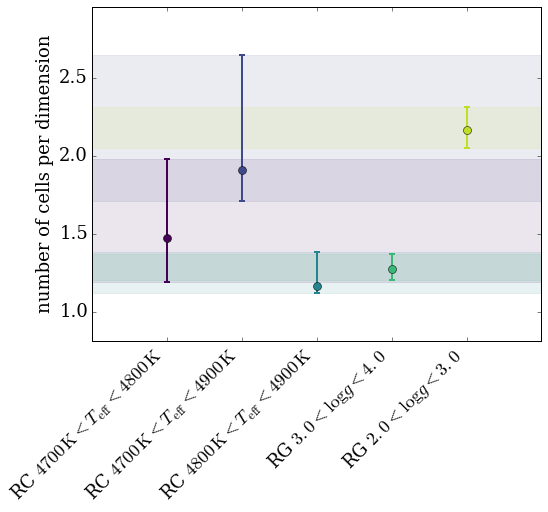

In [294]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up4.0_lo3.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_LOGG_up3.0_lo2.0_MEANFIB_up300.0_lo100.0/bm7935']
labels = ['RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800\,\mathrm{K}$',
          'RC $4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RC $4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900\,\mathrm{K}$',
          'RG $3.0 < \log g < 4.0$',
          'RG $2.0 < \log g < 3.0$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
seeds = [44,26,36,95,62]
colours = plt.get_cmap('viridis')(np.linspace(0,0.9,len(models)*len(direcs)))
sample_compare_ncells_axis(direcs,models,labels,subsamples=25,scale=5,seeds=seeds,figsize=(8,8),generate=True,colour=colours,savename='ncells_lamnoise_comp.pdf',rotation=45,ha='right',bottom_margin=0.35,denom=consth)

## Figure 14 - R2 for red giant subsample comparison

#### To create the data for this figure, run the following in the same directory as this notebook

python run_all_empca.py

#### Then fill out the prompts with the bolded responses

Which sample: red clump, red giant or cluster? **red giant**  
How many eigenvectors in the model (Enter for 60): *press Enter*  
What's the minimum signal to noise? (Enter for 50): *press Enter*   
Shall I get data from scratch? (Enter for yes): **no**  
Which data release? (Enter for 13): **12**  
Type done at any prompt when finished  
Data key: **LOGG**  
Default is full range. Match or slice? **slice**  
Upper limit (Enter for maximum): **3.0**  
Lower limit (Enter for minimum): **2.0**  
Found good limits 
Data key: **done** 

#### Then repeat this script once more, with all prompts the same except for the limits. The other other run should have 

Upper limit (Enter for maximum): **4.0**  
Lower limit (Enter for minimum): **3.0**  

#### This will take about four hours to complete for each run, so run in parallel if possible. Once it's done, run the box below

In [ ]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4900.0_lo4800.0/bm4351',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm4351',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['Standard mask',
          'Fiber cut',
          'Fiber cut and \npersistence\nmask']
models = ['eig20_minSNR50_corrNone_var.pkl',
          'eig20_minSNR50_corrNone_meanMed.pkl']
labels = ['variance','MAD']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))

contrastR2_methods(direcs,models,labels,colors,titles=titles,figsize=(15,6),tingpredict=False,subsamples=5,savename='rg_method_compare.pdf')

In [ ]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4800.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935',
          '/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_giant_12_TEFF_up4900.0_lo4800.0_MEANFIB_up300.0_lo100.0/bm7935']
titles = ['$4700\,\mathrm{K} < T_{\mathrm{eff}} < 4800 \mathrm{K}$',
          '$4700\,\mathrm{K} < T_{\mathrm{eff}} < 4900 \mathrm{K}$',
          '$4800\,\mathrm{K} < T_{\mathrm{eff}} < 4900 \mathrm{K}$']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']
#labels = ['variance','MAD']
colors = plt.get_cmap('plasma')(np.linspace(0,0.85,len(models)))

contrastR2_methods(direcs,models,colors,titles=titles,figsize=(15,6),tingpredict=False,subsamples=5,savename='rc_sample_compare.pdf')

## Figure 15 - Ncells for red giant subsample comparison

## Figure 16 - Eigenvectors in M13

In [46]:
import apogee.spec.window as wn

elems = ['C','N','O','Na','Mg','Al','Si','S','K','Ca','Ti','V','Mn','Fe','Ni']

# Store information about where element windows are                                                                                         
# Track by element name                                                                                                                     
                                                                                                                                        
elemwindows = {}                                                                                                                            
# Track by array in order of periodic table
# Find normalized windows
normwindows = np.zeros((len(elems),aspcappix))
# Find where windows are non-zero
tfwindows = np.zeros((len(elems),aspcappix))
e = 0                                                                                                                                       
for elem in elems:                                                                                                                          
    w = wn.read(elem,dr=13,apStarWavegrid=False)                                                                                            
    # Calculate normalized windows
    nw = np.ma.masked_array(w/np.sqrt(np.sum(w)))                                                                                           
    elemwindows[elem] = w                                                                                                                   
    normwindows[e] = nw    
    # Find where windows are nonzero
    tfwindows[e] = nw!=0
    e+=1                                                                                                                                    
tfwindows = tfwindows.astype(int)

def window_project(es):
    """
    Project eigenvectors onto each of the element windows and renormalize
    
    es:     A list of eigenvectors
    """
    elemeigs = np.sqrt(np.dot(es**2,normwindows.T**2))
    #for e in elemeigs:
    #    e /= np.sqrt(np.sum(e**2))
    return elemeigs

In [141]:
def get_colors(n,cmap='plasma'):
    """
    Find n maximally separated colours from a colour map.
    
    n:     Number of colours to get
    cmap:  Colour map to draw colours from.
    
    """
    # Draw colours in order
    colors = plt.get_cmap(cmap)(np.linspace(0,0.90,n))
    # Split colours into first and last half of the colour map
    fronthalf = colors[:np.ceil(n/2.)]
    backhalf = colors[np.ceil(n/2.):]
    colors = np.empty(colors.shape)
    # Weave colors together so adjacent colours are maximally separated on the colour map
    colors[0::2] = fronthalf
    colors[1::2] = backhalf
    return colors

def get_alt_colors(n,cmap='plasma',maxval=0.7):
    """
    Find n maximally separated colours from a colour map.
    
    n:     Number of colours to get
    cmap:  Colour map to draw colours from.
    
    """
    # Draw colours in order
    colors = plt.get_cmap(cmap)(np.linspace(0,maxval,2))
    # Split colours into first and last half of the colour map
    first = colors[0]
    last = colors[-1]
    colors = np.empty((n,4))
    # Weave colors together so adjacent colours are maximally separated on the colour map
    colors[0::2] = first
    colors[1::2] = last
    return colors

def plot_fullvec(eigvecs,n=5,pixup=8575,pixdown=0,oset=0.08,ncol=5,lw=0.4,**kwargs):
    """
    Plot eigenvectors up to n from model.
    
    eigvecs:   Array of eigenvectors
    n:         Number of eigenvectors to plot
    pixup:     Maximum pixel to plot to
    pixdown:   Minimum pixel to plot to
    oset:      Offset between eigenvectors
    label:     If True, label each eigenvector with its number
    """
    colors = get_alt_colors(n,**kwargs)
    if n%2 == 0:
        colors=colors[::-1]
    # Tracks where the zeropoint is with respect to true zero
    offset = 0
    yticks = np.zeros(n,dtype='S500')
    yticklocs = np.zeros(n)
    ax = plt.subplot(111)
    wvs = pix2wv(np.arange(pixdown,pixup),apStarWavegrid=True)/10**4
    for i in range(n):
        plt.axhline(offset,color='k',lw=1)
        plt.plot(wvs,toApStarGrid(eigvecs[-(i+1)])[pixdown:pixup]+offset,lw=lw,color=colors[i])
        # Track ytick labels and location
        yticks[i] = 'PC {0}'.format(n-i)
        yticklocs[i] = offset
        # Move zeropoint
        offset+=oset
    # Create legend
    plt.ylim(-0.003,(n)*oset-0.005)
    plt.xlabel('$\lambda\,\,(\mu\mathrm{m})$',fontsize=23)
    plt.ylabel('normalized flux + constant')
    yminorlocator = MultipleLocator(oset/2)
    ax.yaxis.set_minor_locator(yminorlocator)
    plt.yticks(yticklocs,yticklocs)
    ax.yaxis.set_tick_params(width=2,which='major',size=7)
    ax.yaxis.set_tick_params(width=2,which='minor',size=4)
    plt.twinx()
    scaledyticklocs = ((yticklocs+0.42*oset)/(n*oset-0.002))
    plt.yticks(scaledyticklocs,yticks)
    #yminorlocator = MultipleLocator((scaledyticklocs[1]-scaledyticklocs[0])/2)
    #ax.yaxis.set_minor_locator(yminorlocator)
    ax.yaxis.set_tick_params(width=2,which='major',size=7)
    ax.yaxis.set_tick_params(width=2,which='minor',size=4)
    #legend = plt.legend(loc='upper center',fontsize=15,ncol=ncol)
    #legend.get_frame().set_linewidth(0.0)
    #for legobj in legend.legendHandles:
    #    legobj.set_linewidth(3.0)
    xminorlocator = AutoMinorLocator()
    ax.xaxis.set_minor_locator(xminorlocator)
    plt.xticks(fontsize=18)
    xlim=plt.xlim(wvs[0],wvs[-1])
    ax.xaxis.set_tick_params(width=2,which='major',size=7)
    ax.xaxis.set_tick_params(width=2,which='minor',size=4)
    
def plot_projvec(eigvec,n=5,yup=0.15,ydown=-0.3):
    # Project eigenvectors onto element windows
    ws = window_project(eigvec[:n])
    colors = get_colors(n=n)
    plt.figure(figsize=(16,8))
    for w in range(len(ws)):
        # Plot projected eigenvectors
        plt.fill_between(np.arange(0,len(ws[w])),np.zeros(len(ws[w])),ws[w],color=colors[w],alpha=0.1)
    for w in range(len(ws)):
        plt.plot(ws[w],'-',color='lightgrey',lw=6)
        plt.plot(ws[w],'o-',color=colors[w],lw=3,label='principal\ncomponent {0}'.format(w+1),markersize=10,markeredgecolor='darkgrey')
    # Plot legend
    legend = plt.legend(loc='best',fontsize=20,ncol=2)
    legend.get_frame().set_linewidth(0.0)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(3.0)
    xtick = plt.xticks(np.arange(0,15),elems)
    ylim=plt.ylim(ydown,yup)

In [56]:
m13 = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2,badcombpixmask=7935)

Which data release? (Enter for 12): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: M13
And/or? and
Data key: MEANFIB
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 300
Lower limit (Enter for minimum): 100
Found good limits
And/or? done
./clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0
NAME  ./clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0


In [57]:
m13.findResiduals(gen=True)

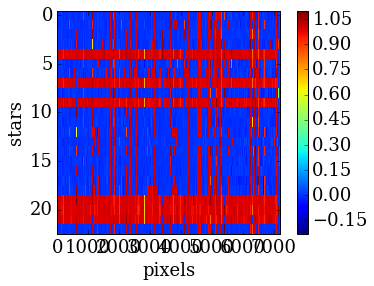

In [65]:
m13.imshow(m13.residuals.data)

1.67233007447
1.67549833269
1.67677194908


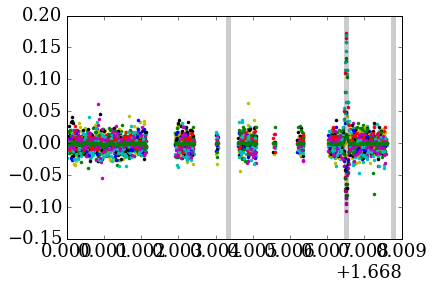

In [70]:
for star in range(len(m13.residuals)):
    res = toApStarGrid(m13.residuals[star])[7200:7600]
    wvs = pix2wv(np.arange(7200,7600),apStarWavegrid=True)
    mask = toApStarGrid(m13.residuals.mask[star])[7200:7600]
    plt.plot(wvs[mask==False]/1e4,res[mask==False],'.')
for l in al:
    print pix2wv(l,apStarWavegrid=True)/1e4
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)

In [89]:
wv2pix(1.51979*1e4)

141

In [90]:
pix2wv(4313)

16189.968359469663

In [113]:
wv2pix(1.618997*1e4)

4313

In [94]:
_ALI_lines

[16723.524113765838, 16755.13999909622, 16767.938194147067]

In [114]:
wv2pix(1.675514*1e4,apStarWavegrid=True)

array(7524)

1.5744830876
1.57530989155
1.57700837595
1.58837850036
1.5890369646
1.59587914724


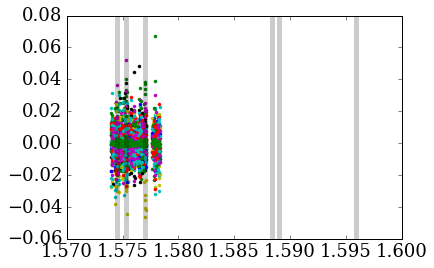

In [71]:
for star in range(len(m13.residuals)):
    res = toApStarGrid(m13.residuals[star])[3000:3200]
    wvs = pix2wv(np.arange(3000,3200),apStarWavegrid=True)
    mask = toApStarGrid(m13.residuals.mask[star])[3000:3200]
    plt.plot(wvs[mask==False]/1e4,res[mask==False],'.')
for l in mg:
    print pix2wv(l,apStarWavegrid=True)/1e4
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)

In [102]:
m13.pixelEMPCA(nvecs=5,varfunc=meanMed,savename='eig5_minSNR50_corrNone_meanMed.pkl')

       iter        R2             rchi2
EMPCA  1/25       0.02160867      2.72451815
EMPCA  2/25       0.30613483      1.88966614
EMPCA  3/25       0.35316264      1.72981500
EMPCA  4/25       0.40662101      1.57037297
EMPCA  5/25       0.42604184      1.52226928
EMPCA  6/25       0.43208765      1.50668031
EMPCA  7/25       0.43393624      1.50029174
EMPCA  8/25       0.43390098      1.49740425
EMPCA  9/25       0.43518597      1.49648086
EMPCA 10/25       0.43635857      1.49664453
EMPCA 11/25       0.43633730      1.49725569
EMPCA 12/25       0.43594077      1.49785141
EMPCA 13/25       0.43565364      1.49816642
EMPCA 14/25       0.43578076      1.49816252
EMPCA 15/25       0.43585165      1.49796289
EMPCA 16/25       0.43581765      1.49772198
EMPCA 17/25       0.43585079      1.49753514
EMPCA 18/25       0.43611688      1.49742884
EMPCA 19/25       0.43622596      1.49739130
EMPCA 20/25       0.43606975      1.49740030
EMPCA 21/25       0.43601643      1.49743652
EMPCA 22/25    

In [244]:
m13model = acs.pklread('clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl')
getarrays(m13model)

In [53]:
n=3
from apogee.spec.plot import _MGI_lines, _ALI_lines
from apogee.tools import wv2pix
mg = wv2pix(_MGI_lines,apStarWavegrid=True)
al = wv2pix(_ALI_lines,apStarWavegrid=True)
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 8525
pixdown = 0
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.015)
plt.savefig('{0}/masked_m13.pdf'.format(figdir))

In [55]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 7600
pixdown =7200
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in al:
    print pix2wv(l,apStarWavegrid=True)/1e4
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Al'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.015,lw=1)
plt.savefig('{0}/masked_m13_Al_{1}-{2}.pdf'.format(figdir,pixdown,pixup))

1.67233007447
1.67549833269
1.67677194908


In [52]:
_ALI_lines

[16723.524113765838, 16755.13999909622, 16767.938194147067]

3023
3061
3139
3659
3689
4000


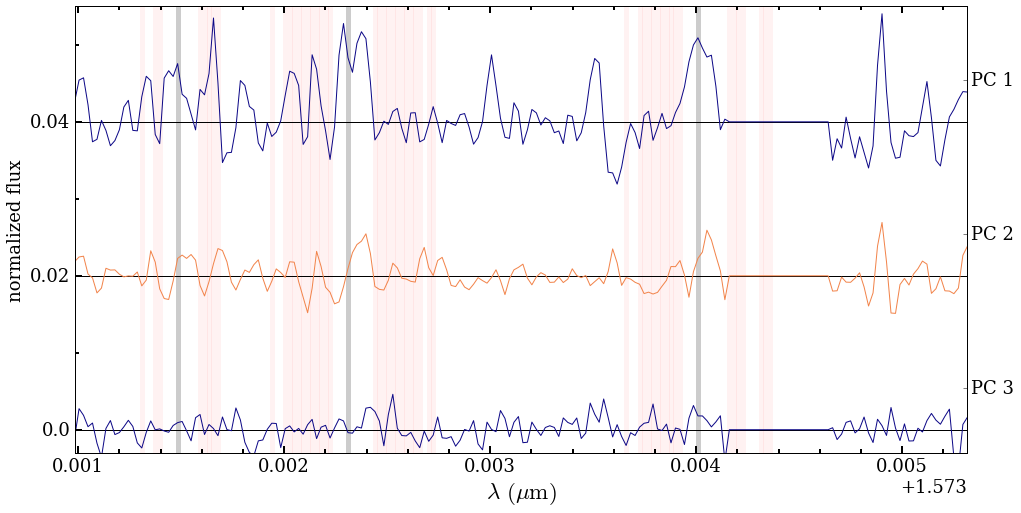

In [124]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 3200
pixdown = 3000
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in mg:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Mg'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)
plt.savefig('{0}/masked_m13_Mg_{1}-{2}.pdf'.format(figdir,pixdown,pixup))

317
342


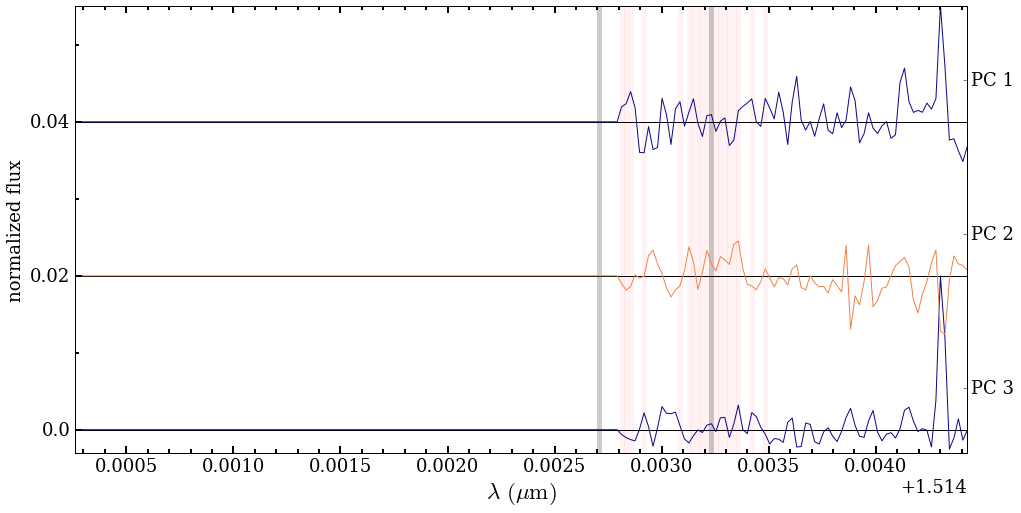

In [117]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 400
pixdown = 200
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _KI_lines
K = wv2pix(_KI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in K:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['K'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

4822
4885
4905
4914


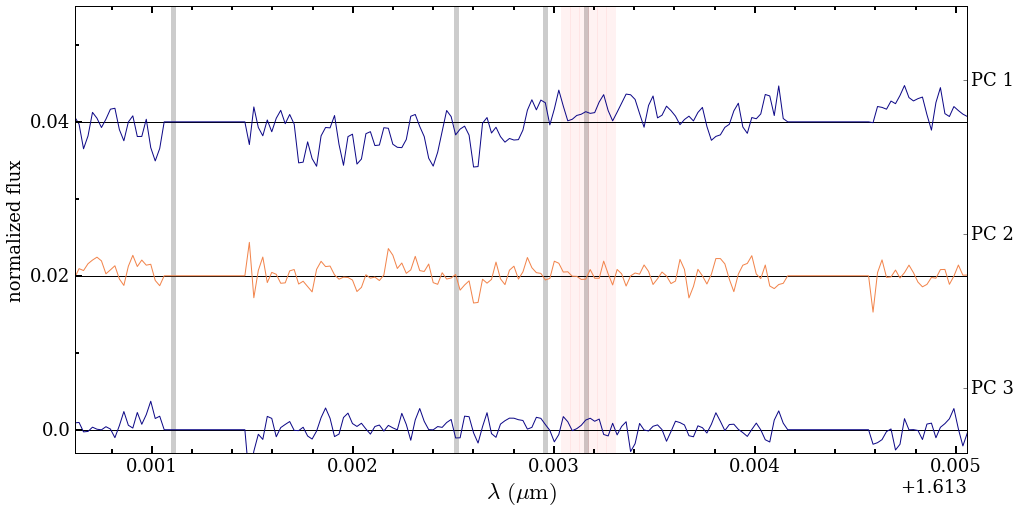

In [119]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 5000
pixdown = 4800
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _CAI_lines
ca = wv2pix(_CAI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in ca:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Ca'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

467
529
1419
1863
2598
4047
4390
4896
4949
7275


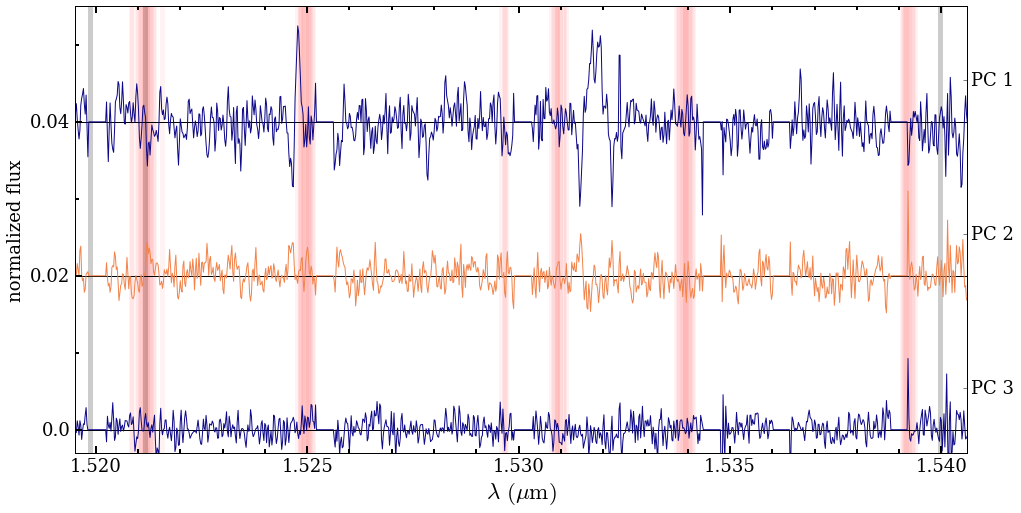

In [121]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 1450
pixdown = 450
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _FEI_lines
fe = wv2pix(_FEI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in fe:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Fe'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

467
529
1419
1863
2598
4047
4390
4896
4949
7275


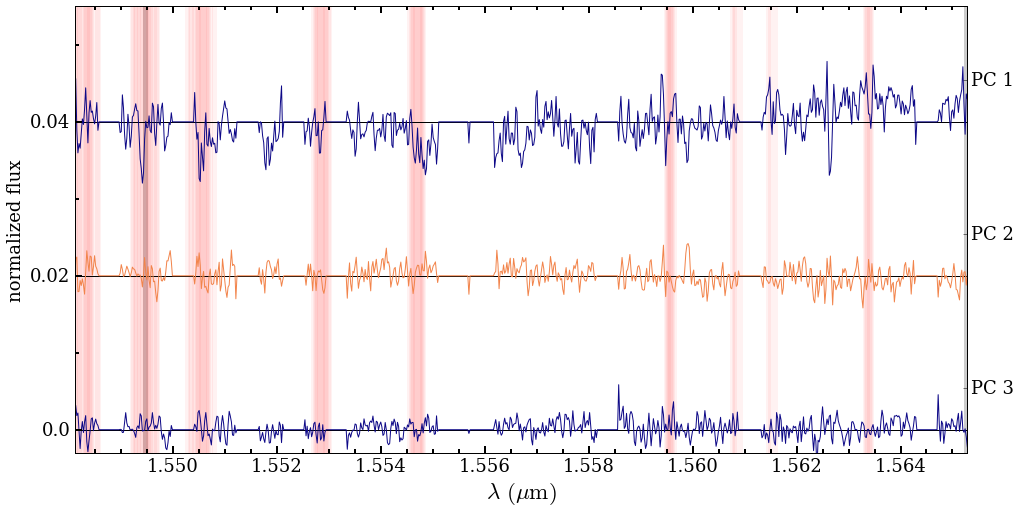

In [123]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 2600
pixdown = 1800
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _FEI_lines
fe = wv2pix(_FEI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in fe:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Fe'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

467
529
1419
1863
2598
4047
4390
4896
4949
7275


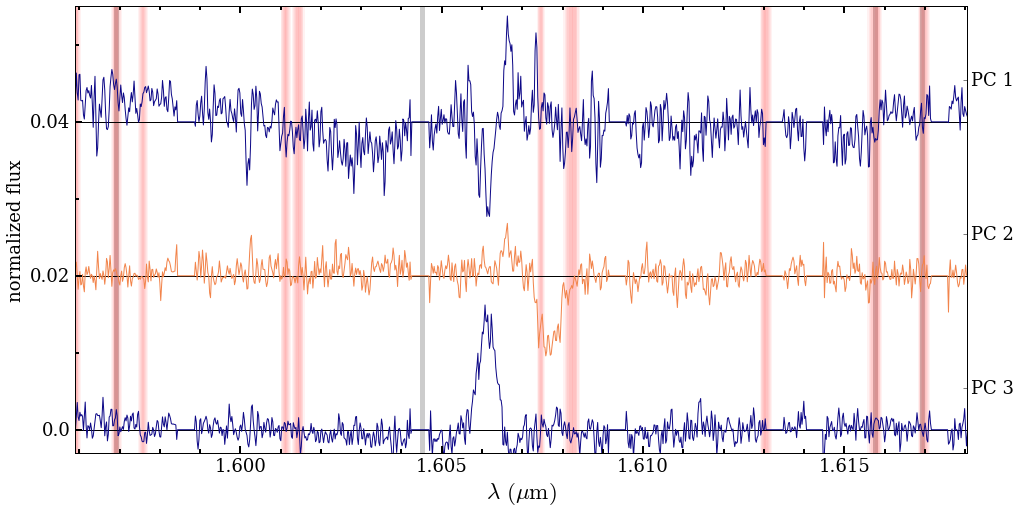

In [122]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 5000
pixdown = 4000
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _FEI_lines
fe = wv2pix(_FEI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in fe:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Fe'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

467
529
1419
1863
2598
4047
4390
4896
4949
7275


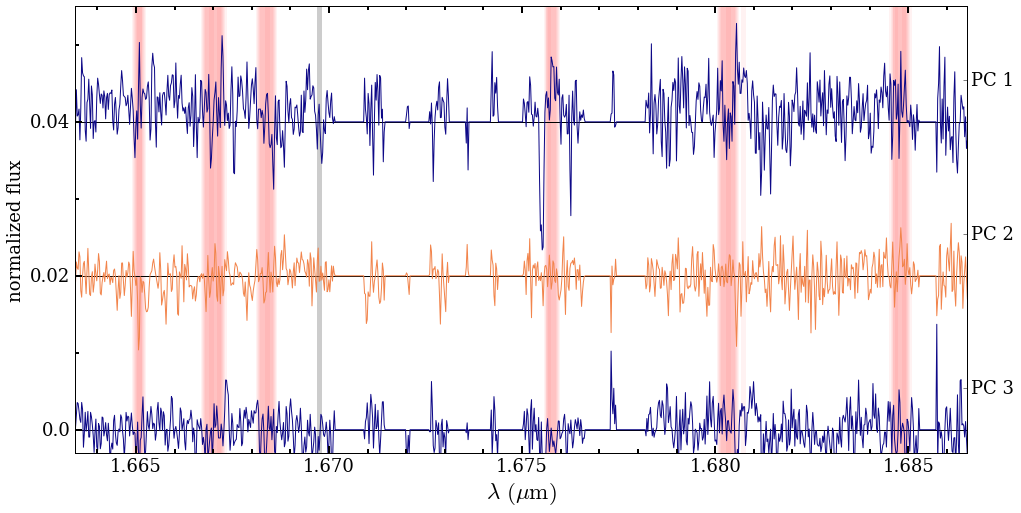

In [125]:
fname = 'clusters_12_CLUSTER_matchM13_MEANFIB_up300.0_lo100.0/bm7935/eig5_minSNR50_corrNone_meanMed.pkl_data.npz'
pixup = 8000
pixdown = 7000
m13model= np.load(fname)
eigvec = m13model['eigvec']
coeff = m13model['coeff']
from apogee.spec.plot import _FEI_lines
fe = wv2pix(_FEI_lines,apStarWavegrid=True)
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in fe:
    print l
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Fe'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.02,lw=1)

In [272]:
m13model = acs.pklread('clusters_12_CLUSTER_matchM13/eig5_minSNR50_corrNone_madTrue.pkl')

In [273]:
n=3
pixup = 8525
pixdown = 0
plt.figure(figsize=(16,8))
medcoeff = np.tile(np.median(np.sqrt(m13model.coeff**2),axis=0),(7214,1)).T
plot_fullvec(m13model.eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset=0.02)
plt.savefig('{0}/unmasked_m13.pdf'.format(figdir))

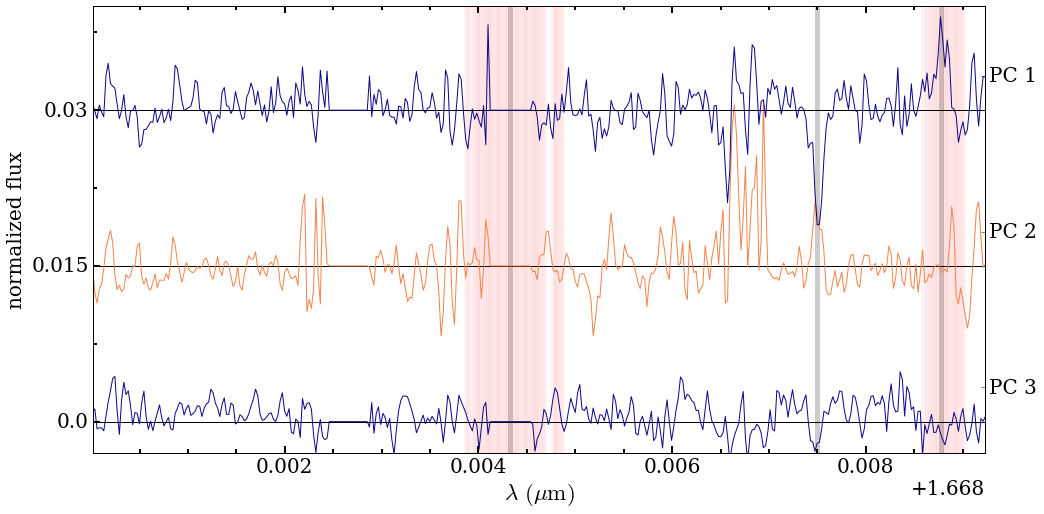

In [274]:
pixup = 7600
pixdown =7200
medcoeff = np.tile(np.median(np.sqrt(m13model.coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in al:
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Al'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(m13model.eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.015,lw=1)
plt.savefig('{0}/unmasked_m13_Al_{1}-{2}.pdf'.format(figdir,pixdown,pixup))

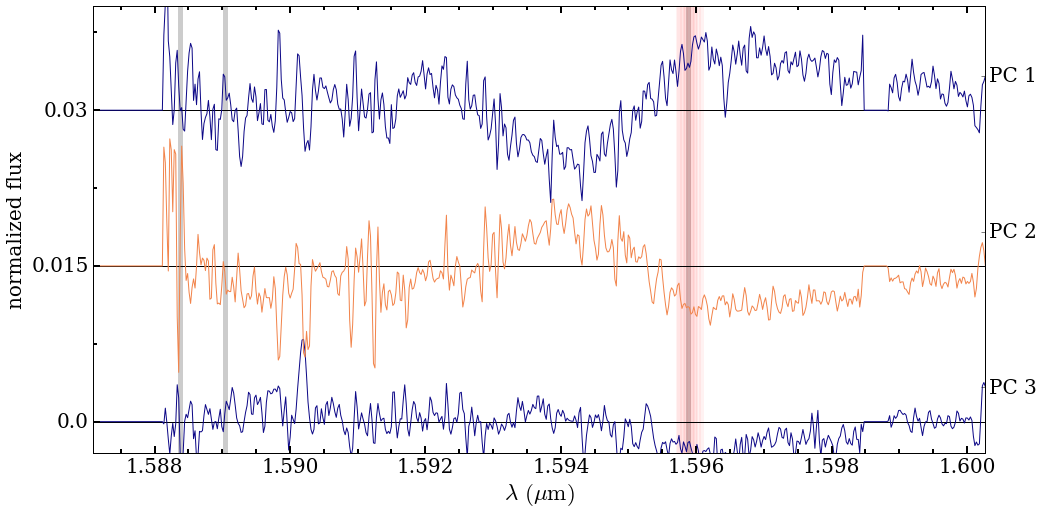

In [276]:
pixup = 4200
pixdown = 3600
medcoeff = np.tile(np.median(np.sqrt(m13model.coeff**2),axis=0),(7214,1)).T
plt.figure(figsize=(16,8))
for l in mg:
    plt.axvline(pix2wv(l,apStarWavegrid=True)/1e4,color='k',lw=5,alpha=0.2)
for k in np.where(toApStarGrid(elemwindows['Mg'])>0)[0]:
    plt.axvline(pix2wv(k,apStarWavegrid=True)/1e4,color='r',lw=5,alpha=0.05)
plot_fullvec(m13model.eigvec*medcoeff,n=n,pixup=pixup,pixdown=pixdown,oset = 0.015,lw=1)
plt.savefig('{0}/unmasked_m13_Al_{1}-{2}.pdf'.format(figdir,pixdown,pixup))

## Figure 17 - Eigenvectors in red clump

In [47]:
direcs = ['/geir_data/scr/price-jones/Data/apogee_dim_reduction/red_clump_12_TEFF_up4900.0_lo4700.0_MEANFIB_up300.0_lo100.0/bm7935']
models = ['eig20_minSNR50_corrNone_meanMed.pkl']

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



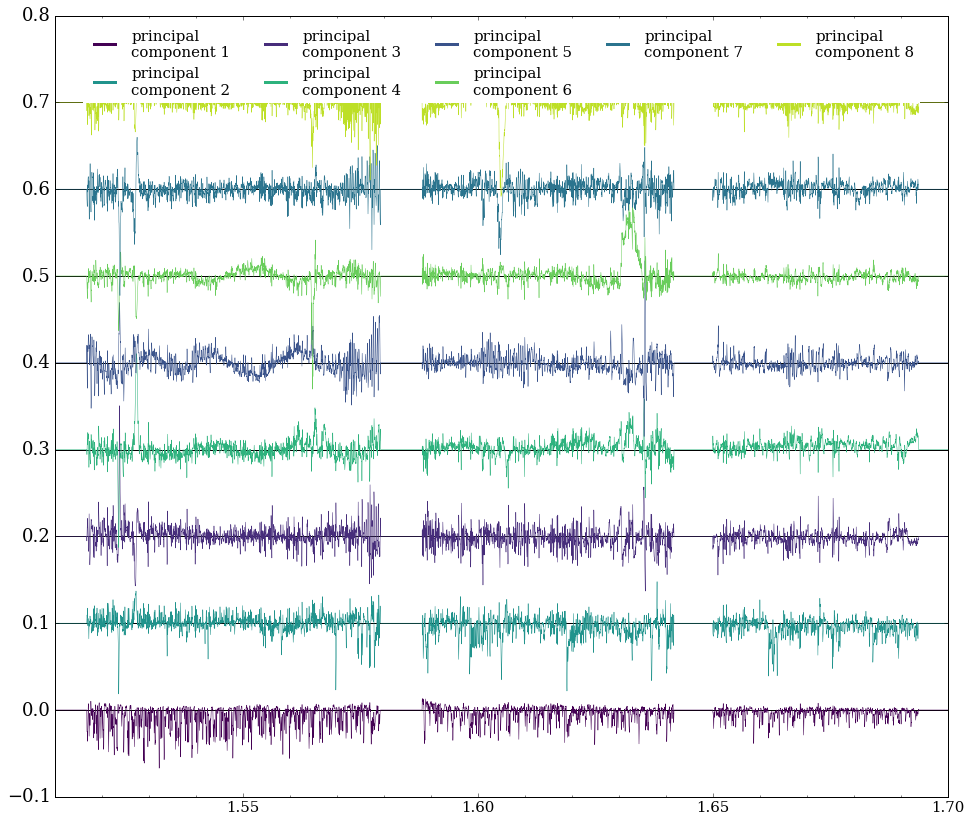

In [37]:
n=8
pixup = 8575
pixdown = 0
subrcmodel = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl_data.npz'.format(direcs[0]))
eigvec = subrcmodel['eigvec']
coeff = subrcmodel['coeff']
plt.figure(figsize=(16,14))
plot_fullvec(eigvec,n=n,pixup=pixup,pixdown=pixdown,oset=0.1,cmap='viridis')
plt.savefig('{0}/unscaled_eigvec.pdf'.format(figdir))

In [142]:
n=10
pixup = 8575
pixdown = 0
subrcmodel = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl_data.npz'.format(direcs[0]))
eigvec = subrcmodel['eigvec']
coeff = subrcmodel['coeff']
medcoeff = np.tile(np.median(np.sqrt(coeff**2),axis=0),(7214,1)).T
oset = 0.007
plt.figure(figsize=(15,8))
plot_fullvec((eigvec*medcoeff)[:n],n=n,pixup=pixup,pixdown=pixdown,oset=oset,ncol = 4,cmap='plasma',maxval=0.67)
plt.savefig('{0}/median_scaled_eigvec.pdf'.format(figdir))

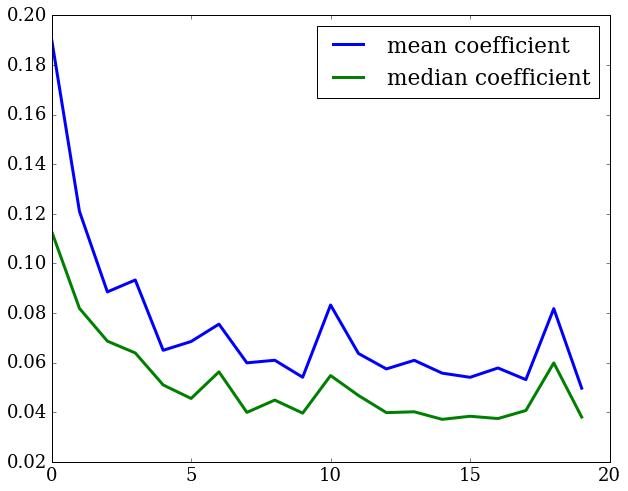

In [183]:
plt.figure(figsize=(10,8))
plt.plot(np.mean(np.sqrt(coeff**2),axis=0),lw=3,label='mean coefficient')
plt.plot(np.median(np.sqrt(coeff**2),axis=0),lw=3,label='median coefficient')
plt.legend(loc='best')
plt.savefig('{0}/coefficient_comp.pdf'.format(figdir))

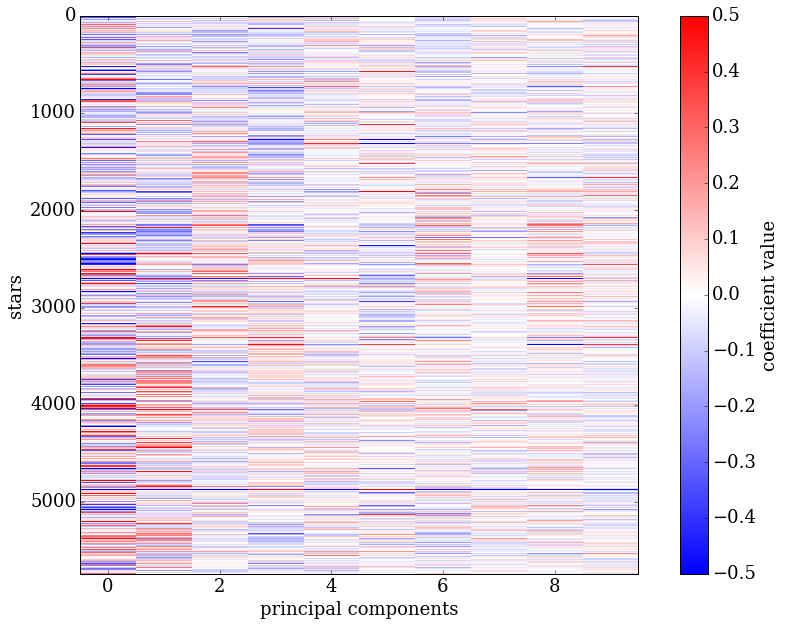

In [172]:
plt.figure(figsize=(15,10))
tempcoeff = coeff.T[:10].T
plt.imshow(tempcoeff,aspect=float(tempcoeff.shape[1])/tempcoeff.shape[0],cmap='bwr',vmin=-0.5,vmax=0.5,interpolation='nearest')
plt.colorbar(label='coefficient value')
plt.ylabel('stars')
plt.xlabel('principal components')
plt.savefig('{0}/coefficients.pdf'.format(figdir))

In [32]:
n=5
pixup = 7214
pixdown = 0
subrcmodel = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl_data.npz'.format(direcs[1]))
eigvec = subrcmodel['eigvec']
plt.figure(figsize=(16,8))
plot_fullvec(eigvec,n=n,pixup=pixup,pixdown=pixdown)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



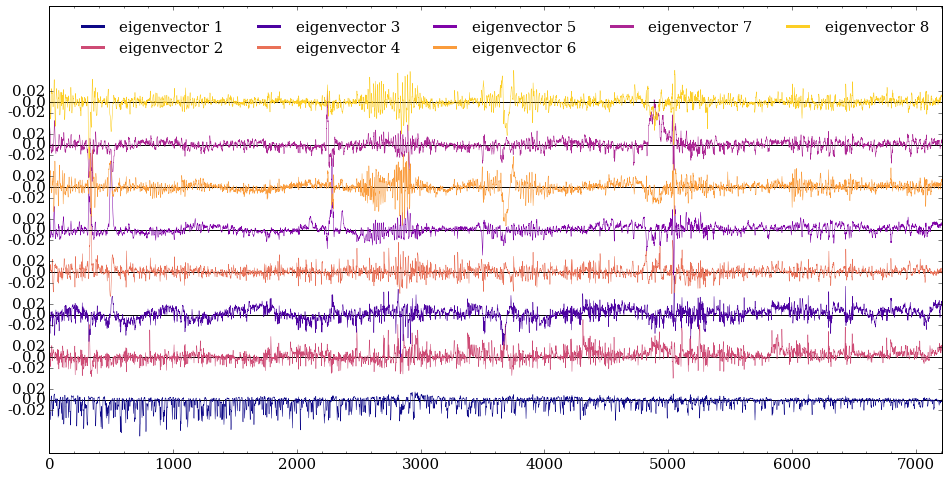

In [30]:
n=8
pixup = 7214
pixdown = 0
subrcmodel = np.load('{0}/eig20_minSNR50_corrNone_meanMed.pkl_data.npz'.format(direcs[2]))
eigvec = subrcmodel['eigvec']
plt.figure(figsize=(16,8))
plot_fullvec(eigvec,n=n,pixup=pixup,pixdown=pixdown)
plt.savefig('{0}/aggressive_eigvec.pdf'.format(figdir))

## Figure 18 - Eigenvectors in N6819

In [116]:
n6819 = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
And/or? done
Data key: done
Done getting filter information


In [ ]:
n6819.samplesplit()

In [35]:
n6819model = acs.pklread('clusters_12_CLUSTER_matchN6819/eig5_minSNR50_corrNone_mean.pkl')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



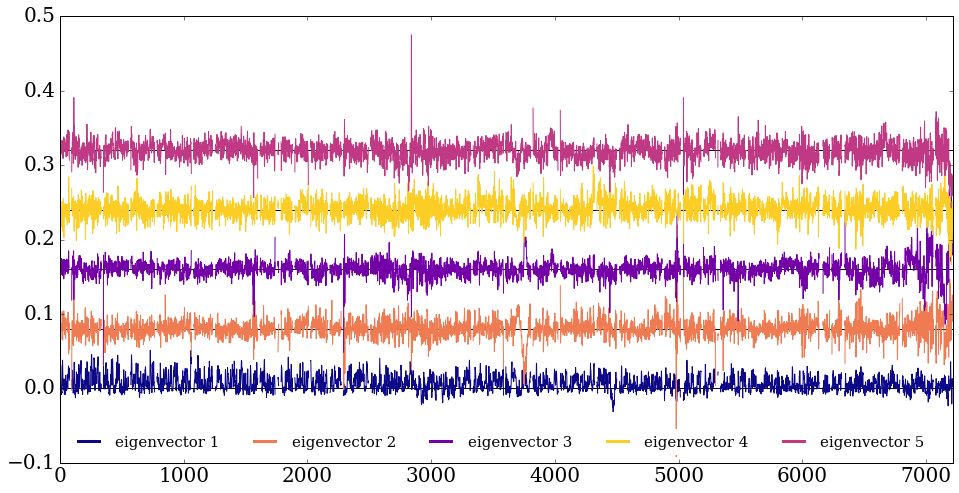

In [36]:
n=5
pixup = 7214
pixdown = 0
plot_fullvec(n6819model,n=n,pixup=pixup,pixdown=pixdown)

In [37]:
n=5
plot_projvec(n6819model,n=n,yup=0.15,ydown=-0.3)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

